# Homework 2: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [1]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [2]:
# define the path to the folder where the SSH data has been download on your machine
data_folder = '/Volumes/T7/MLML/ms274_fall2025/Data'

## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [3]:
# read in the longitude, latitude, and model ssh grid in January 1992 (SSHDYN_1992_01.nc)
jan_1992_file = os.path.join(data_folder, 'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_1992_01.nc')
ds = xr.open_dataset(jan_1992_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
Sshdyn_jan_1992 = np.array(ds['SSHDYN'][:])
ds.close()

# read in the model ssh grid in January 2017 (SSHDYN_2017_01.nc)
jan_2017_file = os.path.join(data_folder, 'Version4','Release4',
                          'interp_monthly','SSHDYN','SSHDYN_2017_01.nc')
ds = xr.open_dataset(jan_2017_file)
Sshdyn_jan_2017 = np.array(ds['SSHDYN'][:])
ds.close()

Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

In [4]:
Sshdyn_jan_diff = Sshdyn_jan_2017[0, :, :] - Sshdyn_jan_1992[0, :, :]

/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/constructive.py:246: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:806: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:806: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)
/opt/miniconda3/envs/ms274/lib/python3.12/site-packages/shapely/predicates.py:762: RuntimeWarning: invalid value encountered in covers
  return lib.co

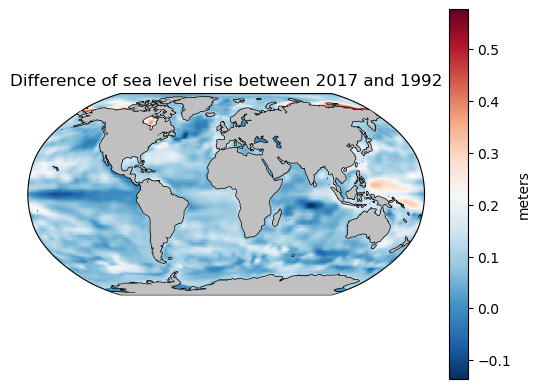

In [5]:
# make a plot of the differences between 2017 and 1992
# make a figure
fig = plt.figure()

# plt.pcolormesh(longitude, latitude, Sshdyn_jan_diff, cmap='RdBu_r')
# plt.colorbar(label='meters')
# # format the axes
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Difference of sea level rise between 2017 and 1992')
# plt.show()

ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
plt.pcolormesh(longitude, latitude, Sshdyn_jan_diff, cmap='RdBu_r',
              transform = ccrs.PlateCarree())
plt.colorbar(label='meters')

# # add coastlines
ax.add_feature(cfeature.LAND, facecolor='silver', zorder=10)
ax.coastlines()

# # format the axes
plt.title('Difference of sea level rise between 2017 and 1992')
plt.show()

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer: 
Highest sea rise is in seas near the Artic Ocean, like the East Siberian Sea and Chukchi sea. There is also notable sea rise in the western Pacific ocean, near the equator.
Sea level drop in the Indian Ocean & eastern Pacific Ocean near the equator. 

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [6]:
# define the latitude and longitude
lon = -122
lat = 37

# find the row and column closest to the location of the point off the CA coast
# note that you have already read in the longitude and latitude if the grid to make the plot above
lon_index = np.argmin(np.abs((-122) - longitude))

lat_index = np.argmin(np.abs((37) - latitude))

# sanity check
print('CLosest longitude to -122 in the longitude array is', longitude[lon_index])
print('CLosest latitude to 37 in the latitude array is', latitude[lat_index])

CLosest longitude to -122 in the longitude array is -122.25
CLosest latitude to 37 in the latitude array is 36.75


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

In [7]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second


# make a list to contain the file names
file_list = []
# loop through the 12 months
for year in range(1992,2018):
    for month in range(1,13):
        file_list.append('SSHDYN_'+str(year)+'_'+'{:02d}'.format(month)+'.nc')

# define a time array for months
months = np.arange(len(file_list))
# convert to "decimal years"
years = 1992 + months/12

ssh_values = np.zeros((len(file_list),))
# loop through each file
for i in range(len(file_list)):
    
    # identify path to the data file
    month_file = os.path.join(data_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN',file_list[i])
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    Ssh = np.array(ds['SSHDYN'][:])
    ds.close()
    # subset to first timestep
    Ssh = Ssh[0,lat_index,lon_index]
    ssh_values[i] = Ssh

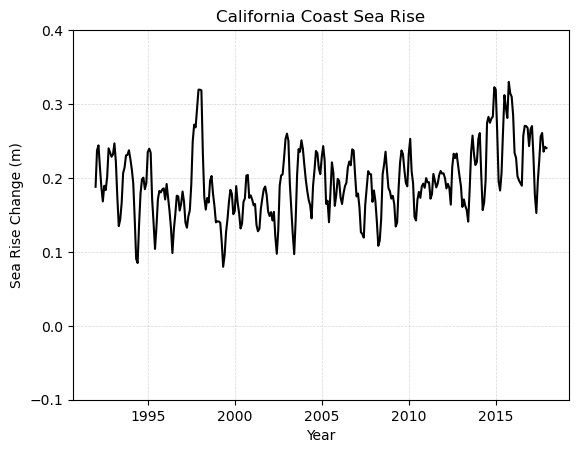

In [8]:
## plotting
plt.plot(years, ssh_values, 'k-')

# format the axes
plt.gca().set_ylim([-0.1,0.4])
plt.ylabel('Sea Rise Change (m)')
plt.xlabel('Year')
plt.title('California Coast Sea Rise')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)

# show the plot
plt.show()

## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

In [9]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second
ssh_avg_values = np.zeros((len(file_list),))
# loop through each file
for i in range(len(file_list)):
    
    # identify path to the data file
    month_file = os.path.join(data_folder,'Version4','Release4',
                          'interp_monthly','SSHDYN',file_list[i])
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    Ssh = np.array(ds['SSHDYN'][:])
    ds.close()
    # subset to first timestep
    Ssh = Ssh[0,:,:]
    Ssh[Ssh == 0] = np.nan
    avg_Ssh = np.nanmean(Ssh)
    ssh_avg_values[i] = avg_Ssh

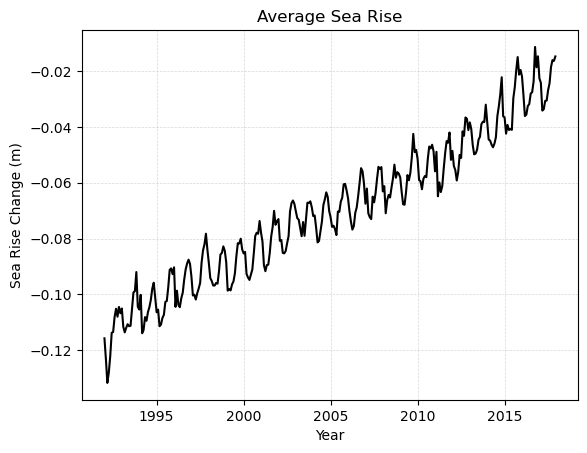

In [10]:
## plotting
plt.plot(years, ssh_avg_values, 'k-')

# format the axes
plt.ylabel('Sea Rise Change (m)')
plt.xlabel('Year')
plt.title('Average Sea Rise')
plt.grid(linestyle='--',linewidth=0.5,alpha=0.5)

# show the plot
plt.show()

## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

In [11]:
# compute the trends in SLR by fitting a line to the CA and the global mean timeseries
# compute the line coefficients
california_coast_line_coefficients = np.polyfit(years, ssh_values, deg=1)
avg_line_coefficients = np.polyfit(years, ssh_avg_values, deg=1)
cali_mm_change_per_year = california_coast_line_coefficients[0] * 1000
avg_mm_change_per_year = avg_line_coefficients[0] * 1000

# print out the statistics in mm/yr for each timeseries
print("Total mm rise in sea surface height per year california coastline:", round(cali_mm_change_per_year, 2))
print("Total mm rise in sea surface height per year gloval avg:", round(avg_mm_change_per_year, 2))

Total mm rise in sea surface height per year california coastline: 2.08
Total mm rise in sea surface height per year gloval avg: 3.38


### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer: The sea level rise is noticeably smaller in California compared to the global mean rate. 

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

Text(0, 0.5, 'Sea Rise Change (m)')

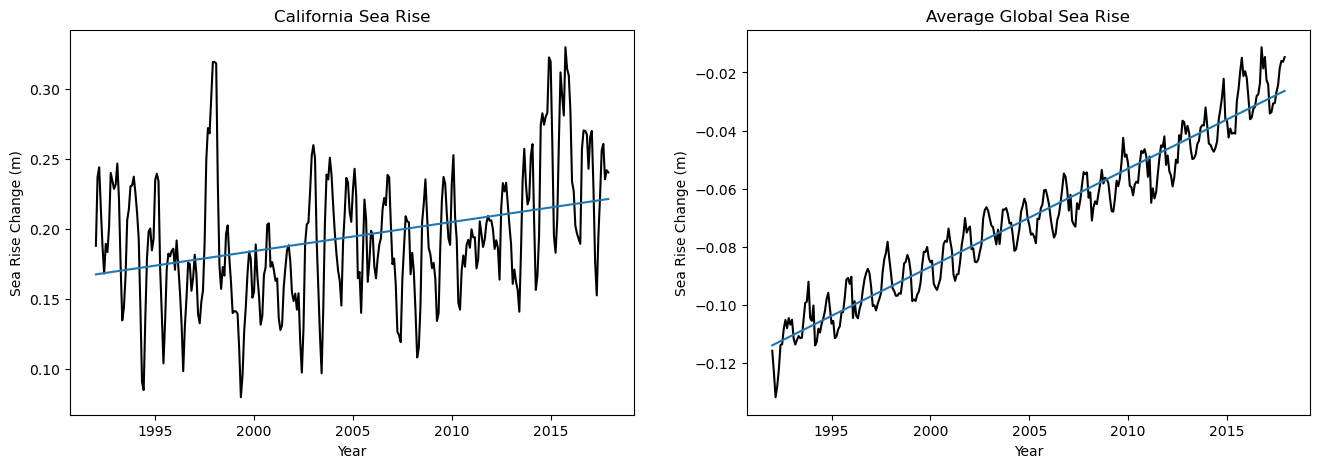

In [12]:
# create your plot here
fig = plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(years, ssh_values, 'k-')
plt.plot(years, california_coast_line_coefficients[0] * years + california_coast_line_coefficients[1]) 
plt.title('California Sea Rise')
plt.xlabel('Year')
plt.ylabel('Sea Rise Change (m)')

plt.subplot(1,2,2)
plt.plot(years, ssh_avg_values, 'k-')
plt.plot(years, avg_line_coefficients[0] * years + avg_line_coefficients[1]) 
plt.title('Average Global Sea Rise')
plt.xlabel('Year')
plt.ylabel('Sea Rise Change (m)')

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer: There is far more variability for California, easily seen with the trend line being much flatter compared to the global trend. Overall there is a much more obvious trend towards sea rise increasing globally compared to California. Two highest years are around 1997 and 2015, both were El Nino events. 